# Welcome to Visualization

Attached is the link to the forestfires dataset: [Forestfires in Portugal](https://archive.ics.uci.edu/ml/datasets/Forest+Fires)

### Import Packages

In [1]:
from bokeh.plotting import figure, output_file, show
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Activate dataset

In [2]:
forest = pd.read_csv("forestfires.csv")
forest.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [3]:
forest.shape # 517 rows and 13 variables

(517, 13)

In [4]:
forest.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [5]:
forest.isnull().sum() # No missing values

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

# Questions

## Question 1
### Name the variables that explain at least 30 percent of the correlation

<AxesSubplot:>

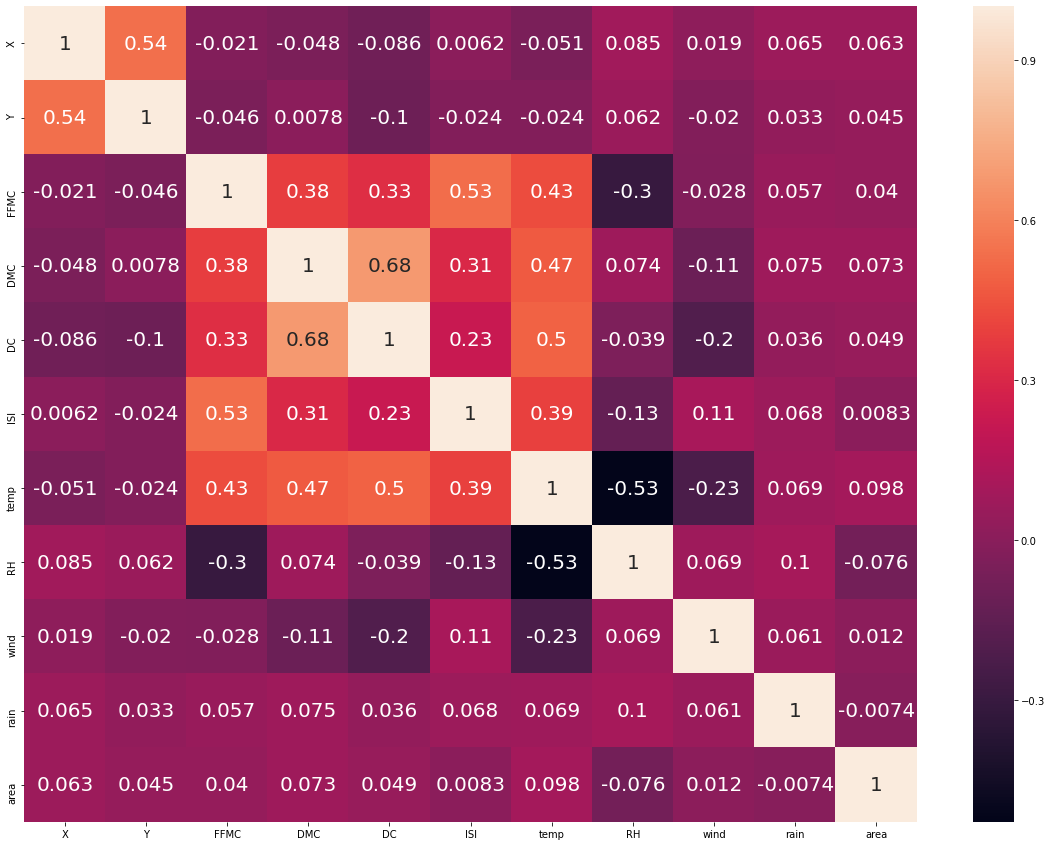

In [6]:
corr = forest.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True,annot_kws={"size": 20})

Conclusions:

- The answer is : X, Y, FFMC, DMC, DC, ISI, temp
- We will let go of the other variables in the correlation matrix

## Adjust the dataset

In [7]:
forest2 = forest.iloc[:,0:9]
forest2.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4


## Question 2
### Name the months that have at least 50 forest fires and then for each month, find the corresponding day of the week that contains the most forest fires

<AxesSubplot:>

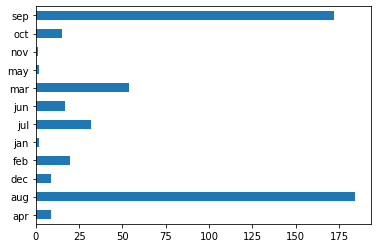

In [8]:
forest2['month'].value_counts().sort_index().plot.barh()

In [9]:
forestsep = forest2.query("month == ['sep']")
forestmar = forest2.query("month == ['mar']")
forestaug = forest2.query("month == ['aug']")

<AxesSubplot:>

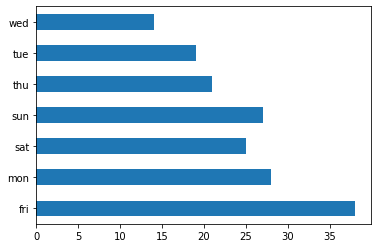

In [10]:
forestsep['day'].value_counts().sort_index().plot.barh()

<AxesSubplot:>

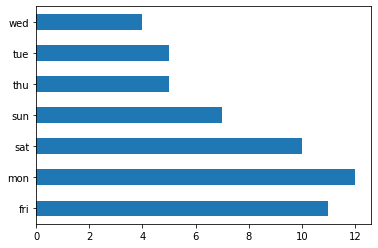

In [11]:
forestmar['day'].value_counts().sort_index().plot.barh()

<AxesSubplot:>

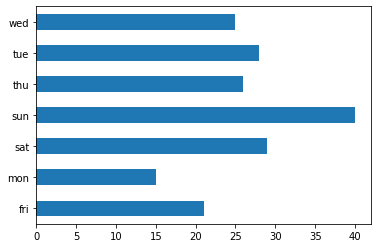

In [12]:
forestaug['day'].value_counts().sort_index().plot.barh()

Conclusions:
- Friday on September
- Monday on March
- Sunday on August

## Question 3
### What happens when we take the three months in highest forest fires and compare the temperature?

In [13]:
forestmonth = forest2.query("month == ['mar','aug','sep']")
forestmonth.shape

(410, 9)

In [14]:
forestmonth.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1


<AxesSubplot:xlabel='month', ylabel='temp'>

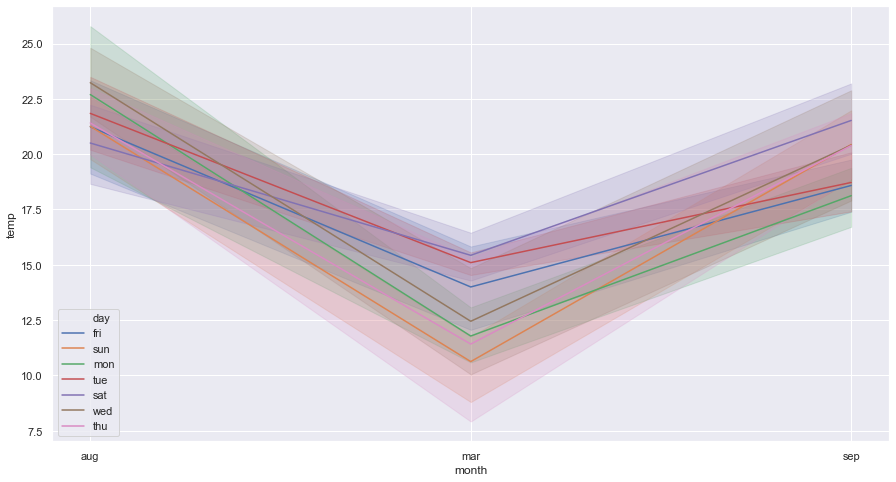

In [15]:
sns.set(rc={'figure.figsize':(15,8)})
sns.lineplot(x="month",y="temp",hue="day",data=forestmonth)

Conclusions:

- This would be pretty obvious given that august and september are summer months
- Interesting fact: on March, it seems that sunday is quite colder in difference compared to saturday

## Question 4
### When we take the month and day of most forest fires, what changes in the linear relationship among the column indexes, FFMC to ISI?

In [16]:
forestaug = forest2.query("month == ['aug']")

In [17]:
augsun = forestaug.query("day == ['sun']")
augsun.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2
25,7,4,aug,sun,91.4,142.4,601.4,10.6,16.3
51,4,3,aug,sun,90.2,99.6,631.2,6.3,21.5
63,2,2,aug,sun,90.2,99.6,631.2,6.3,20.8
80,1,2,aug,sun,91.4,142.4,601.4,10.6,19.5


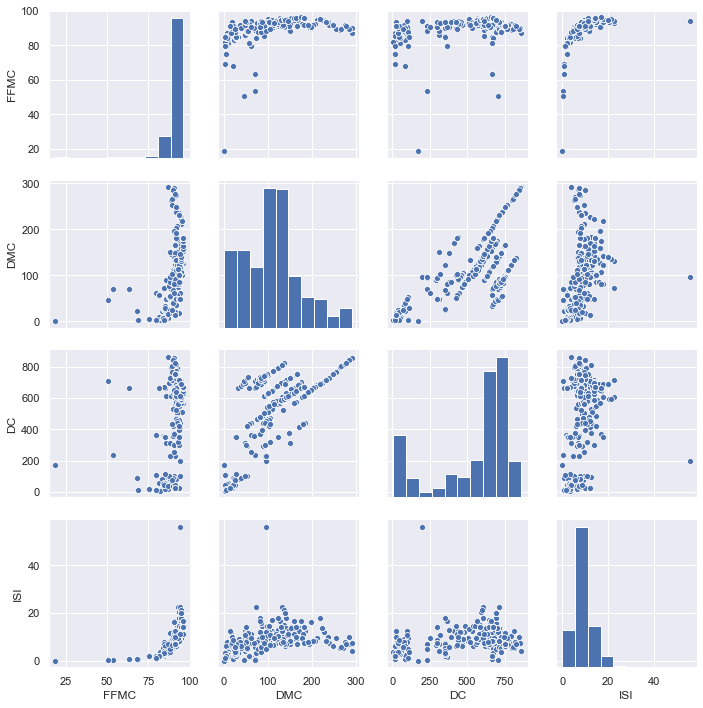

In [18]:
sns.pairplot(forest[["FFMC","DMC","DC","ISI"]])

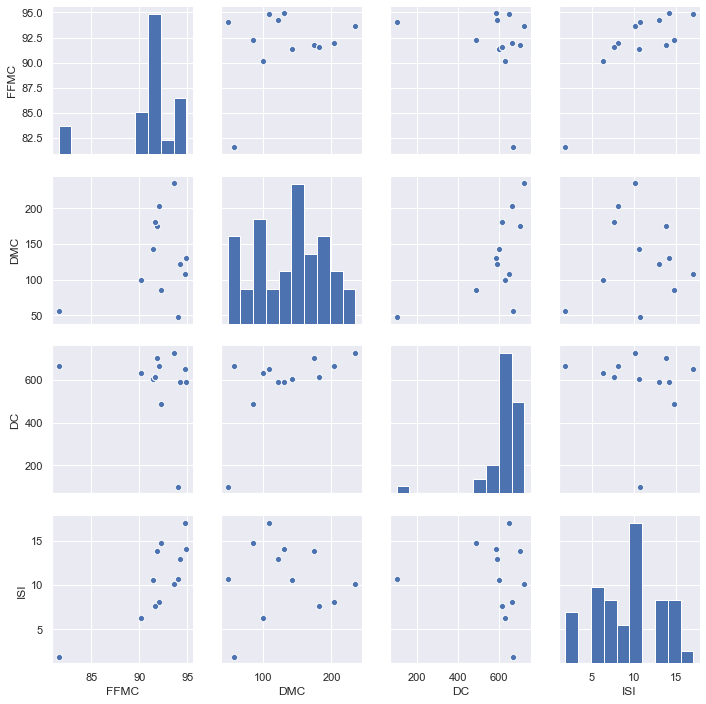

In [19]:
sns.pairplot(augsun[["FFMC","DMC","DC","ISI"]])

Conclusion:

- Obviously, we have less data points in the second image
- Generally with more data points, you can see which direction the points are moving
- With the second image, we can see ISI and FFMC are linearly increasing despite the shortage in data points

## Question 5
### The highest index column in value is DC. What happens when we compare as we go through all months?

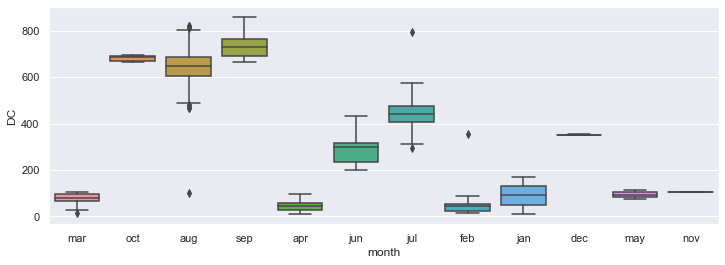

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches((12,4))
sns.boxplot(x='month',y='DC',data=forest,ax=ax)
plt.show()

Conclusion:

- It doesn't matter that the index has the highest values
- You can see how the distribution of data fluctuates across the months
- Some months are just unknown and have nothing to offer

## Question 6
### How is area affected based on month and based on day?

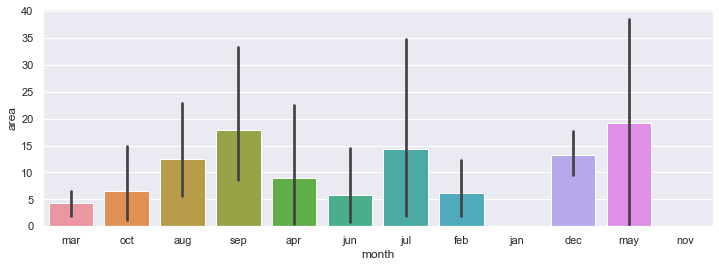

In [39]:
fig, ax = plt.subplots()
fig.set_size_inches((12,4))
sns.barplot(x='month',y='area',data=forest,ax=ax)
plt.show()

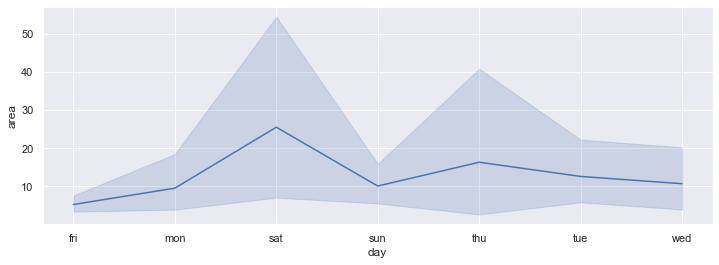

In [44]:
fig, ax = plt.subplots()
fig.set_size_inches((12,4))
sns.lineplot(x='day',y='area',data=forest,ax=ax)
plt.show()

Conclusion:

- Aside from a couple months, all area density is below 20 on all months
- Area increases as we approach summer
- There's a huge shift from saturday to sunday probably because activity is quiet

## Question 7
### Let's separate month by season and see which season has the most forest fires

In [50]:
summer = forest.query("month == ['jun','jul','aug']")
spring = forest.query("month == ['mar','apr','may']")
fall = forest.query("month == ['sep','oct','nov']")
winter = forest.query("month == ['dec','jan','feb']")

In [57]:
count = []
for i in summer,spring,fall,winter:
    print(i.shape[0])
    count.append(i.shape[0])

233
65
188
31


In [60]:
seasons = ['summer','spring','fall','winter']

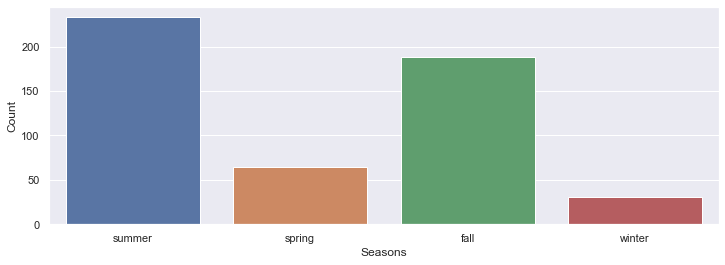

In [62]:
Seasonal = {'Seasons':seasons,'Count':count}
SeasonalCount = pd.DataFrame(Seasonal)
fig, ax = plt.subplots()
fig.set_size_inches((12,4))
sns.barplot(x='Seasons',y='Count',data=SeasonalCount,ax=ax)
plt.show()

Conclusions:

- We query seasons based on months, append to different dictionaries and create a dataframe
- From summer to fall, forest fires are high, but the other half of the seasons produces inactivity

## Question 8
### Does the seasonal forest fire count from above affect the density distribution of our spatial coordinates across each season?

Let's use summer and winter

In [53]:
x1 = summer[['X']]
y1 = summer[['Y']]
x2 = winter[['X']]
y2 = winter[['Y']]

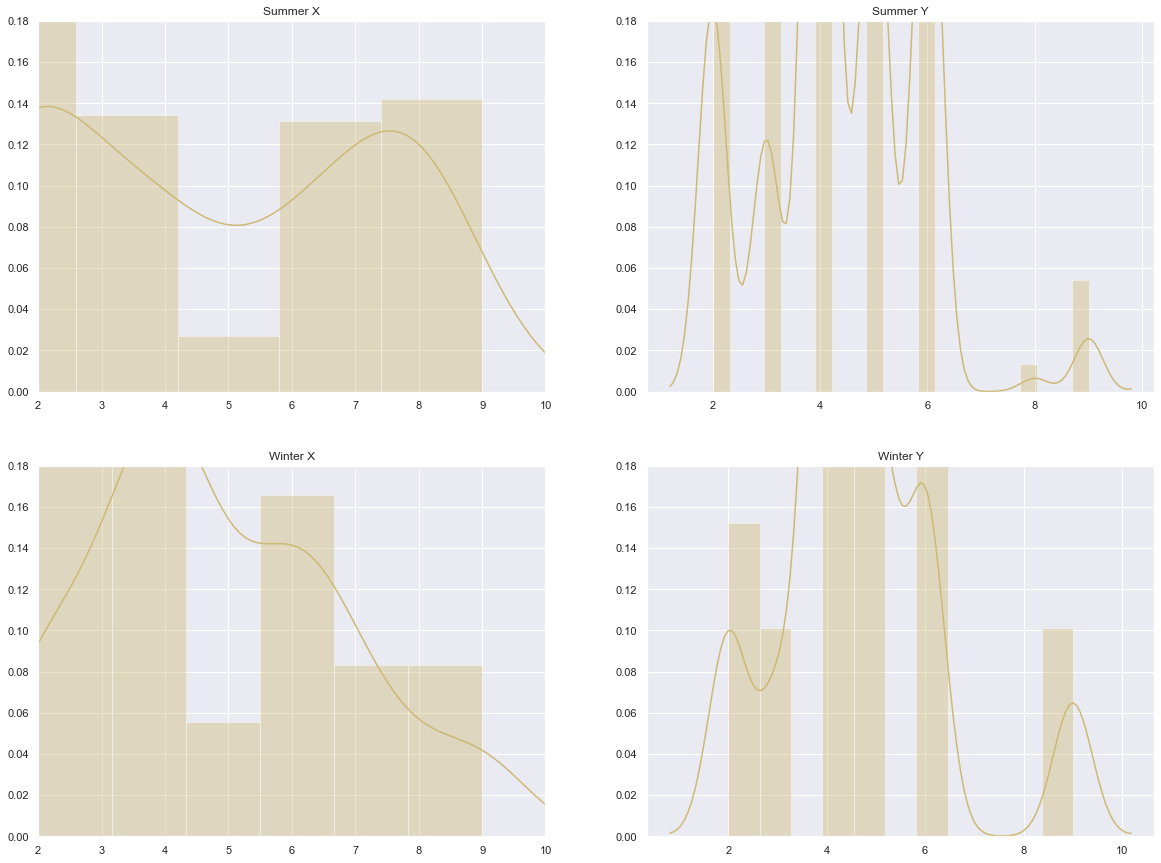

In [60]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
a = sns.distplot(x1,color="y", ax=ax1)
b = sns.distplot(y1,color="y", ax=ax2)
c = sns.distplot(x2,color="y", ax=ax3)
d = sns.distplot(y2,color="y", ax=ax4)
a.set_title("Summer X")
b.set_title("Summer Y")
c.set_title("Winter X")
d.set_title("Winter Y")
a.set(xlim=(2,10),ylim=(0,0.18))
b.set(ylim=(0, 0.18))
c.set(xlim=(2,10),ylim=(0, 0.18))
d.set(ylim=(0, 0.18))
plt.show()

Conclusions:

- So, we are using the summer and winter season and you can see that the xlim and ylim are the same for the 2 by 2
- The fluctuations in the histogram do not really affect the difference among the density distributions